In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dataset-soc-project:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5431373%2F9014243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240727%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240727T021628Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1ed691877297047760c34c2075b053683f47466ad6c97d726cbfa98a31b97b8b21827e8b4ec83c6ebbb19a9b99fd23d810bcb2d9f4df7b2f0c3d9936a49221a51e044826af6645df6e530a4b0385bce1430204ec30a6dbb8b81dc5e6e0fbaf3d660babaaf359f6ef16db1812dfce5d82bc3ebc8cd1fba327ca00bc7904699b7d7b65bedcd971c7d0528d640fb10cdb08581c6eec3376d2d9fd76a89349e2d6d993bfc6a02fc1fd27fcf931aa146ceb82d028efb62265c3d0340bc5fd19b6caaa4f853a8e44cb415a344bc69fd2f986210611c9637c713d7c622b6db4714176c8dc7bbcea7ba5792cc3d5e9ca65398a3e864b5ef6a39e747b4b11013f13a88cba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1152300481 bytes downloaded
Downloaded and uncompressed: dataset-soc-project
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0111_59408.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0047_59448.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0007_58433.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0119_59681.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0123_58546.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0118_59393.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0130_59500.jpg
/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images/069.Rufous_Hum

In [5]:


import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential , Model
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
import shutil
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0


In [6]:

# Paths to dataset files
images_path = r'/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images.txt'
train_test_split_path = r'/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/train_test_split.txt'
image_class_labels_path = r'/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/image_class_labels.txt'
classes_path = r'/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/classes.txt'
images_dir = r'/kaggle/input/dataset-soc-project/CUB_200_2011/CUB_200_2011/images'


images = pd.read_csv(images_path, sep=' ', header=None, names=['image_id', 'image_name'])
train_test_split = pd.read_csv(train_test_split_path, sep=' ', header=None, names=['image_id', 'is_training_image'])
image_class_labels = pd.read_csv(image_class_labels_path, sep=r' ', header=None, names=['image_id', 'class_id'])
classes = pd.read_csv(classes_path, sep=r' ', header=None, names=['class_id', 'class_name'])

# Merge the dataframes to get all relevant information in one place
data = images.merge(train_test_split, on='image_id')
data = data.merge(image_class_labels, on='image_id')
data = data.merge(classes, on='class_id')


In [7]:

# Create directories for train and test data
train_dir = 'train'
test_dir = 'test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create class subdirectories in train and test directories
for class_name in classes['class_name']:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Move images to respective directories
missing_files = []
for index, row in data.iterrows():
    image_name = row['image_name']
    class_id = row['class_id']
    class_name = classes.loc[classes['class_id'] == class_id, 'class_name'].values[0]
    is_training_image = row['is_training_image']

    src_path = os.path.join(images_dir, image_name)
    if is_training_image:
        dest_path = os.path.join(train_dir, class_name, image_name)
    else:
        dest_path = os.path.join(test_dir, class_name, image_name)

    # Ensure destination directory exists
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)

    # Check if the source file exists
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
    else:
        missing_files.append(src_path)

if missing_files:
    print("The following files were not found and were skipped:")
    for file in missing_files:
        print(file)
else:
    print("All files were successfully copied.")

print("Data has been organized into train and test directories.")



All files were successfully copied.
Data has been organized into train and test directories.


In [8]:

# Load training dataset from the train directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Load testing dataset from the test directory
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=0,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)



Found 5994 files belonging to 200 classes.
Found 5794 files belonging to 200 classes.


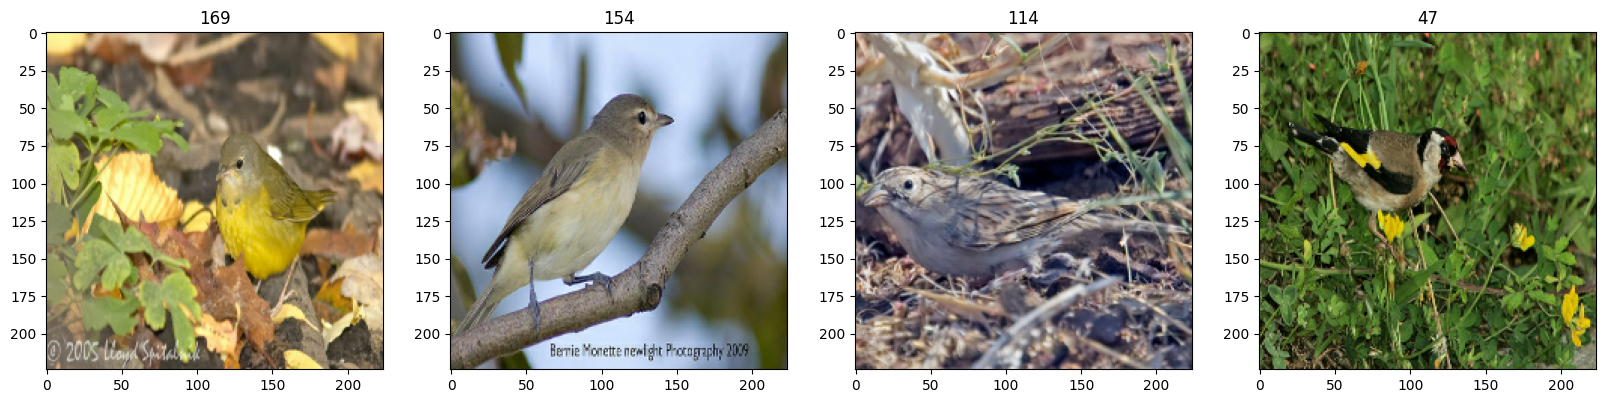

In [9]:

data_iterator = train_data.as_numpy_iterator()


batch=data_iterator.next()

fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])




In [10]:

# Load the EfficientNetB0 model with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if using one-hot encoded labels
              metrics=['accuracy'])

# Display the model summary
model.summary()


16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

In [11]:

# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
)



Epoch 1/10
188/188 [==============================] - 51s 201ms/step - loss: 3.5184 - accuracy: 0.3372 - val_loss: 2.2194 - val_accuracy: 0.5773
Epoch 2/10
188/188 [==============================] - 28s 148ms/step - loss: 1.6586 - accuracy: 0.7030 - val_loss: 1.5565 - val_accuracy: 0.6726
Epoch 3/10
188/188 [==============================] - 30s 155ms/step - loss: 1.1021 - accuracy: 0.8061 - val_loss: 1.3114 - val_accuracy: 0.7031
Epoch 4/10
188/188 [==============================] - 30s 158ms/step - loss: 0.8260 - accuracy: 0.8615 - val_loss: 1.1815 - val_accuracy: 0.7201
Epoch 5/10
188/188 [==============================] - 29s 152ms/step - loss: 0.6544 - accuracy: 0.8934 - val_loss: 1.1097 - val_accuracy: 0.7249
Epoch 6/10
188/188 [==============================] - 28s 148ms/step - loss: 0.5339 - accuracy: 0.9194 - val_loss: 1.0659 - val_accuracy: 0.7301
Epoch 7/10
188/188 [==============================] - 28s 149ms/step - loss: 0.4517 - accuracy: 0.9361 - val_loss: 1.0304 - val_ac

In [12]:
_ , test_acc =  model.evaluate(test_data)
print('Test accuracy:', test_acc*100,'%')

182/182 [==============================] - 15s 80ms/step - loss: 0.9797 - accuracy: 0.7384
Test accuracy: 73.83500337600708 %


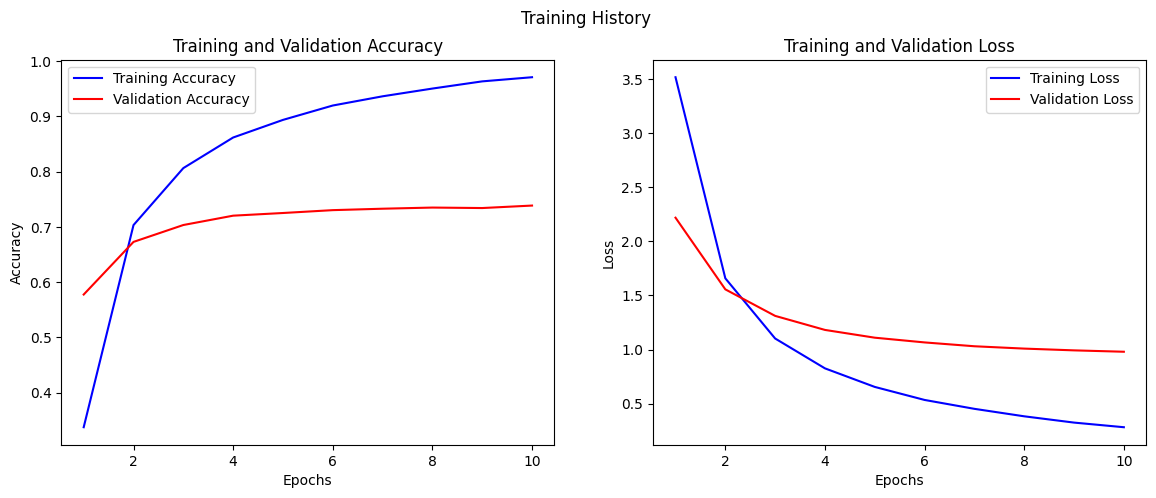

In [13]:
def plot_training_history(history, title='Model Training History'):
    # Extract the history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.show()

# Plot the initial training history
plot_training_history(history, title='Training History')


In [14]:
# Save the model
model.save('bird_detector.keras')

In [15]:
from google.colab import files
files.download('bird_detector.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>